<a href="https://colab.research.google.com/github/PRAFULPAWAR8888/Kaggle_DataScience_Practice/blob/main/TensorFlow_Deepp_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#
TensorFlow deep NN
A high-level tutorial into Deep Learning using MNIST data and TensorFlow library

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
#settings
LEARNING_RATE = 1e-4

#set to 20000 on local environment to get
TRAINING_STEPS = 2500

DROPOUT = 0.5
BATCH_SIZE = 50

# SET TO TRAIN ON ALL AVAILABLE DATA
VALIDATION_SIZE = 2000

# IMAGE NUMBER TO OUTPUT
IMAGE_TO_DISPLAY = 10

# DAT PREPARATION
  TO start, we read provided data, The train.csv file contains 42000 rows and 785 columns. Each row represents an image of a handwriten digit and a lavel with the value of this digit.




In [3]:
# read training data from csv file
data = pd.read_csv("/content/drive/MyDrive/Data/DigitRecognizer/train.csv")

In [4]:
print('data({0[0]},{0[1]})'.format(data.shape))
print(data.head())


data(33269,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0   

# Every image is a "Stretched" array of pixel values

In [7]:
images = data.iloc[:,1:].values
images = images.astype(float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))

images(33269,784)


# In this case it's 784 pixel => 28 * 28px

In [8]:
image_size = images.shape[1]
print("image_size => {0}".format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)
print('image_width => {0}\nimage_height => {1}'.format(image_width, image_height))

image_size => 784
image_width => 28
image_height => 28


To output one of  the images, we reshape this long string of pixels into a 2-dimensional array , whcich is vasically a grayscale image.

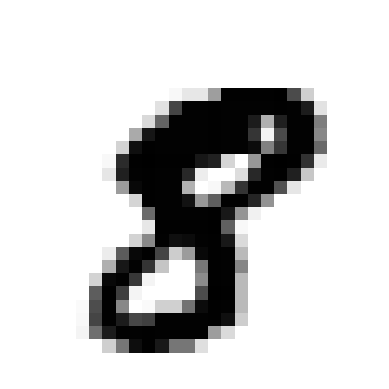

In [11]:
# display image
def display(img):
  #(784) => (28,28)
  one_image = img.reshape(image_width, image_height)
  plt.axis("off")
  plt.imshow(one_image, cmap=cm.binary)
# output image
display(images[IMAGE_TO_DISPLAY])

# The corresponding labels are numbers between 0 and 9, describing which digit a given image is of.

In [13]:
labels_flat = data['label'].values.ravel()

print('labels_flat({0})'.format(len(labels_flat)))
print('labels_flat[{0}]=>{1}'.format(IMAGE_TO_DISPLAY, labels_flat[IMAGE_TO_DISPLAY]))

labels_flat(33269)
labels_flat[10]=>8


# In this case, there are ten different digits/labels/classes

In [14]:
labels_count = np.unique(labels_flat).shape[0]
print('labels_count => {0}'.format(labels_count))

labels_count => 10


**For most classification promblem "one-hot vectors" are used . A one-hot  vector is a vector that contains a single element equal to 1  and the rest a zero vector with 1 in the nth postion**

In [18]:
# split data into training & validation
validation_images = images[:VALIDATION_SIZE]
validation_labels = labels_flat[:VALIDATION_SIZE]

train_images = images[VALIDATION_SIZE:]
train_labels = labels_flat[VALIDATION_SIZE:]


print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))

train_images(31269,784)
validation_images(2000,784)
